<a href="https://colab.research.google.com/github/juanreutter/ABM/blob/master/Ingreso_mayor_dos_millones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Analisis cuestionario Expectativas (B) para agregado con todas las organizaciones de Telar

In [110]:
#@title
import psycopg2
import pandas
import matplotlib.pyplot as plt

import numpy
import warnings
warnings.filterwarnings("ignore", category=numpy.VisibleDeprecationWarning) 


In [111]:
### para word clouds 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
 
class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('spanish'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data
 
    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:


# Ojo, deben tener PSQL corriendo y cambiar por los datos de su usuario.
conn = psycopg2.connect(database = "Datos", 
                        user = "telar", 
                        password = "telarimfd", 
                        host = "167.71.97.39", 
                        port = "5432")

sqlper = "SELECT * FROM consolidadoperfilamiento;"
perfilamiento = pandas.read_sql_query(sqlper, conn)

sqlexp = "SELECT * FROM consolidadoexpectativas_pre_elecciones;"
expectativss = pandas.read_sql_query(sqlexp, conn)


Para filtrar el merge por algo especíífico. 


In [143]:
def filtro_genero(filtro, perfilamiento): 
  ### retornar cuando filtro = "mujer" o = "hombre"
  if filtro == "mujer": 
    usuarios = perfilamiento[perfilamiento["q3"]==2]["idusuario"]
  if filtro == "hombre": 
    usuarios = perfilamiento[perfilamiento["q3"]==1]["idusuario"]
  return usuarios

def filtro_panel(filtro, perfilamiento): 
    usuarios = perfilamiento[perfilamiento["idpanel"]==filtro]
    return usuarios

def filtro_categoria(filtro, perfilamiento): 
  if filtro == "ong": 
    usuarios = perfilamiento[(perfilamiento["idpanel"] == 2) | (perfilamiento["idpanel"] == 5) | (perfilamiento["idpanel"] == 4) | (perfilamiento["idpanel"] == 26) | (perfilamiento["idpanel"] == 15) | (perfilamiento["idpanel"] == 7) | (perfilamiento["idpanel"] == 8) | (perfilamiento["idpanel"] == 9) | (perfilamiento["idpanel"] == 27) | (perfilamiento["idpanel"] == 6)]
  if filtro == "ese": 
    usuarios = perfilamiento[(perfilamiento["idpanel"] == 12) | (perfilamiento["idpanel"] == 24)| (perfilamiento["idpanel"] == 25)]
  if filtro == "hm": 
    usuarios = perfilamiento[(perfilamiento["idpanel"] == 11) | (perfilamiento["idpanel"] == 17)| (perfilamiento["idpanel"] == 18)| (perfilamiento["idpanel"] == 19)]
  if filtro == "otros": 
    usuarios = perfilamiento[(perfilamiento["idpanel"] == 13) | (perfilamiento["idpanel"] == 14)| (perfilamiento["idpanel"] == 20)| (perfilamiento["idpanel"] == 21)]
  return usuarios

def filtro_ingreso_menor(filtro, perfilamiento): 
    usuarios = perfilamiento[perfilamiento["q20"]<filtro]
    return usuarios

def filtro_ingreso_mayor(filtro, perfilamiento): 
    usuarios = perfilamiento[perfilamiento["q20"]>filtro]
    return usuarios



<h1> MODIFICAR ESTO: X es el panel a filtrar

Posibles filtros implementados: 
- genero
- panel
- categoria (ese - ongs) 


<h2> Para comparar: usar X e Y (no implementado)

In [144]:

### saca las mujeres en X y el resto en Y 

#filtro1 = filtro_categoria("ong", perfilamiento)
#filtro2 = filtro_genero("hombre", perfilamiento)
#filtro = filtro_panel(2, perfilamiento)
filtro1 = filtro_ingreso_menor(11,perfilamiento)
filtro1 = filtro_ingreso_mayor(19,perfilamiento)

merge = pandas.merge(perfilamiento,expectativss,on='idusuario')

filtrado1 = pandas.merge(merge,filtro1,on='idusuario')
#filtrado2 = pandas.merge(merge,filtro2,on='idusuario')


X= filtrado1


#### para las etiquetas

labX = "Menor a 10"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67adef3310>]],
      dtype=object)

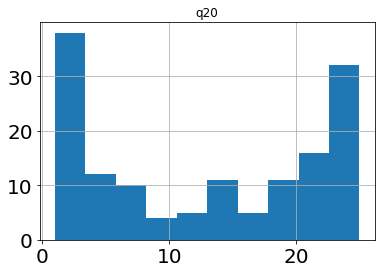

In [146]:
perfilamiento[perfilamiento["q3"] ==4]["q3"].count()
perfilamiento["q20"].median()
perfilamiento[perfilamiento["q20"] <= 5].count()
perfilamiento.hist(column="q20")

<h1> Resultados 


In [147]:
print("Numero de personas:  " + str(X["idusuario"].count()))

Numero de personas:  49


<h2> En una escala de 1 a 7, donde 1 es "nada" y 7 es "totalmente": ¿en qué grado usted apoyó las demandas levantadas por la ciudadanía a partir el 18 de octubre de 2019?


Media Menor a 10: 5.0
Desvest. Menor a 10: 1.613893169571858


<Figure size 1080x360 with 0 Axes>

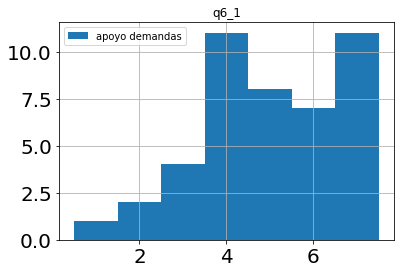

In [148]:



##### usando q6_1 de cuestionario B 


plt.figure(figsize=(15,5))
X.hist(column="q6_1", bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="apoyo demandas")
#plt.hist([X["q6_1"].values.flatten(),Y["q6_1"].values.flatten()], bins = [1,2,3,4,5,6,7], label=[labX, labY])

plt.legend()
plt.rc('xtick', labelsize=20)
#plt.rc('ytick', labelsize=20)

print("Media "+labX+": " + str(X["q6_1"].mean())  )

print("Desvest. "+labX+": " + str(X["q6_1"].std())  )

#print("Media "+labX+": " + str(X["q6_1"].mean()) +  "     |         media "+labY+": " + str(Y["q6_1"].mean())   )

#print("Desvest. "+labX+": " + str(X["q6_1"].std()) +  "     |         desvest. "+labY+": "  + str(Y["q6_1"].std()) )


#fig, axes = plt.subplots(1, 2,figsize=(20,5))

#X.hist(column="q6_1", bins=[1,2,3,4,5,6,7],ax = axes[0])
#Y.hist(column = 'q6_1', bins=[1,2,3,4,5,6,7], ax = axes[1])


<h2> ¿Participó de alguna forma en las movilizaciones que tuvieron lugar en Chile a partir de octubre de 2019?


In [149]:

#### usando q7 de cuestionario para expectativas

print(labX+" % de SI: " + str((X[X["q7"]==1]["q7"].count())/(X["q7"].count()))  )
#print(labX+" % de SI: " + str((X[X["q7"]==1]["q7"].count())/(X["q7"].count())) +  "     |         "+labY+" % de SI:  "  + str(Y[Y["q7"]==1]["q7"].count()/Y["q7"].count() ) )



Menor a 10 % de SI: 0.2653061224489796


<h2> Seleccione la o las formas en que usted participó (puede marcar más de una alternativa)

- 1 marchas
- 2 cacerolazos
- 3 primera linea
- 4 reuniones comunitarias/territoriales
- 5 cabildos
- 6 compartiendo en redes sociales
- 7 participando de intervenciones artisticas
- 8 toma de colegios, terrenos, fabricas u oficinas
- 9 saltar torniquetes
- 10 Bloqueo Calles o carreteras
- 11 huelga
- 12 otra


1
(array([12,  8,  0,  2,  4, 10,  2,  0,  0,  0,  0,  1]), array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5]))


([<matplotlib.axis.XTick at 0x7f67ade12950>,
 [Text(0, 0, 'marcha'),
  Text(0, 0, 'cacerola'),
  Text(0, 0, '1ralinea'),
  Text(0, 0, 'reuniones'),
  Text(0, 0, 'cabildos'),
  Text(0, 0, 'rrss'),
  Text(0, 0, 'artisticas'),
  Text(0, 0, 'tomas'),
  Text(0, 0, 'torniquetes'),
  Text(0, 0, 'bloqueo'),
  Text(0, 0, 'huelga'),
  Text(0, 0, 'otra')])

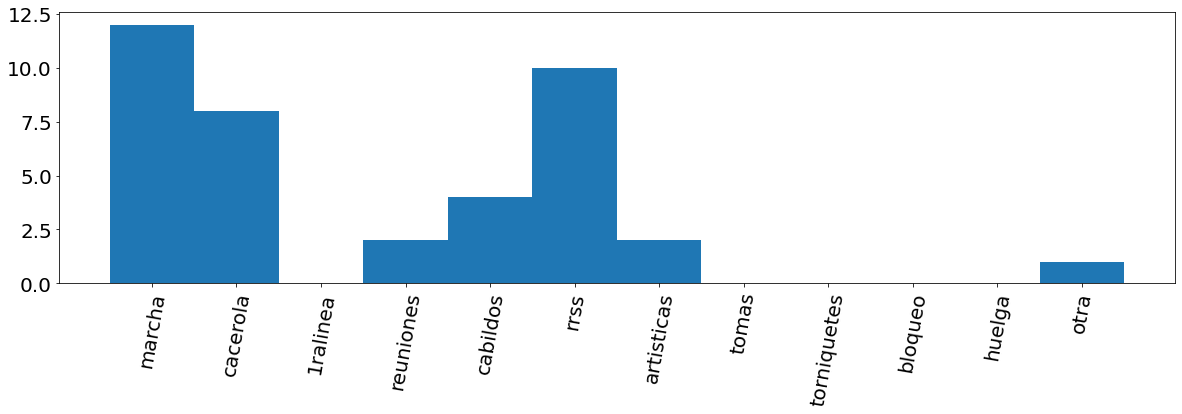

In [150]:
#### por ahora no tomamos en cuenta quien dice que si no que sumamos todo. 
computo = []
prueba = 0
for respuesta in X["q8_y"]:
  if isinstance(respuesta, str):
    for op in respuesta.split(","): 
      computo.append(int(op))
      if int(op) == 12: 
        prueba += 1
print(prueba)
cuenta = numpy.histogram(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])

print(cuenta)
plt.figure(figsize=(20,5))
plt.hist(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['marcha', 'cacerola', '1ralinea', 'reuniones', 'cabildos', 'rrss', 'artisticas', 'tomas', 'torniquetes', 'bloqueo', 'huelga', 'otra'],rotation=80) 



#### hacer lo mismo pa Y

<h2>En una escala del 1 a 7, en que 1 es "nada" y 7 es "totalmente": ¿En qué medida cree que el proceso constituyente responderá con soluciones a las demandas/problemas que causaron el “estallido” de octubre de 2019?

Media:Menor a 10: 3.911111111111111
Desvest.Menor a 10: 1.2399087617134323


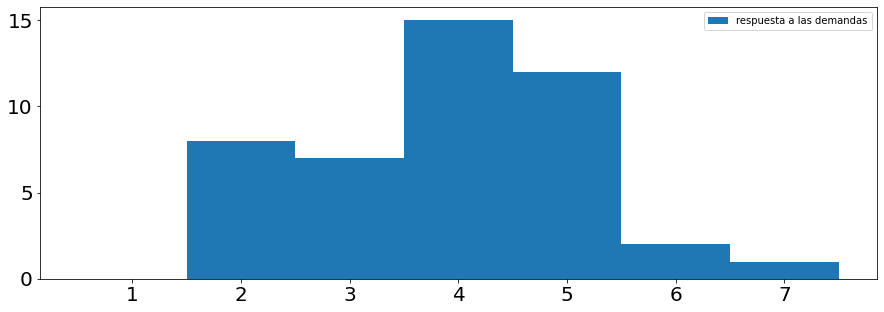

In [151]:
####usando "q9_13"

plt.figure(figsize=(15,5))
plt.hist([X["q9_13"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="respuesta a las demandas")
#plt.hist([X["q9_13"].values.flatten(),Y["q9_13"].values.flatten()], bins = [1,2,3,4,5,6,7,8,9,10,11], label=[labX, labY])


plt.legend()
plt.rc('xtick', labelsize=20)
#plt.rc('ytick', labelsize=20)

print("Media:"+labX+": " + str(X["q9_13"].mean()))
print("Desvest."+labX+": " + str(X["q9_13"].std()) )



#print("Media:"+labX+": " + str(X["q9_13"].mean()) +  "     |         media"+labY+": "    + str(Y["q9_13"].mean())   )
#print("Desvest."+labX+": " + str(X["q9_13"].std()) +  "     |         desvest."+labY+": "   + str(Y["q9_13"].std()) )


#fig, axes = plt.subplots(1, 2,figsize=(20,5))

#X.hist(column="q9_13", bins=[1,2,3,4,5,6,7],ax = axes[0])
#Y.hist(column = 'q9_13', bins=[1,2,3,4,5,6,7], ax = axes[1])

<h2>Pensando en el último mes, ¿con qué frecuencia ha conversado o discutido sobre el contenido y las temáticas de la nueva constitución? 

- 1 varias veces por semana
- 2 mas de una vez por semana 
- 3 menos d euna vez por semana
- 4 casi nunca 
- 5 nunca

Media:Menor a 10: 2.142857142857143
Desvest.Menor a 10: 0.9128709291752772


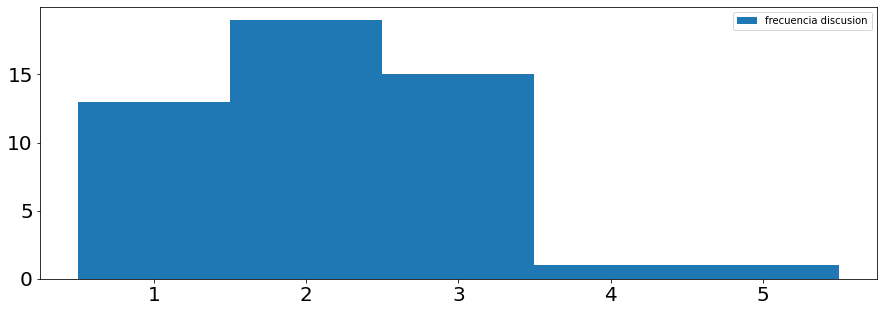

In [152]:
##usando q2_y 

columna = "q2_y"

plt.figure(figsize=(15,5))
#plt.hist([X[columna].values.flatten(),Y[columna].values.flatten()], bins = [1,2,3,4,5], label=[labX, labY])
plt.hist([X[columna].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5], label="frecuencia discusion")


plt.legend()
plt.rc('xtick', labelsize=20)
#plt.rc('ytick', labelsize=20)

print("Media:"+labX+": " + str(X[columna].mean())   )
print("Desvest."+labX+": " + str(X[columna].std())  )

#print("Media:"+labX+": " + str(X[columna].mean()) +  "     |         media"+labY+": "    + str(Y[columna].mean())   )
#print("Desvest."+labX+": " + str(X[columna].std()) +  "     |         desvest."+labY+": "   + str(Y[columna].std()) )


#fig, axes = plt.subplots(1, 2,figsize=(20,5))

#X.hist(column=columna, bins=[1,2,3,4,5,6,7],ax = axes[0])
#Y.hist(column = columna, bins=[1,2,3,4,5,6,7], ax = axes[1])

<h2> ¿Ha participado de alguna de las siguientes instancias para informarse sobre las elecciones que se realizarán los días 15 y 16 de mayo? 

([<matplotlib.axis.XTick at 0x7f67ae31b550>,
 [Text(0, 0, 'cabildos'),
  Text(0, 0, 'reuniones c candidatos'),
  Text(0, 0, 'asambleas vecinales'),
  Text(0, 0, 'asambleas sindicales'),
  Text(0, 0, 'franjas')])

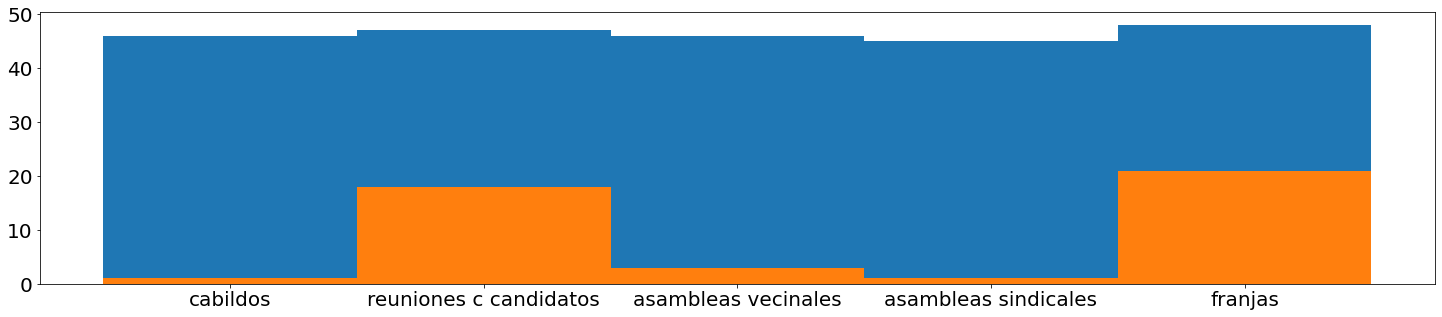

In [153]:
###pendiente, es Q3_1 hasta Q3_5


#### por ahora no tomamos en cuenta quien dice que si no que sumamos todo. 
computo = []
no = []
prueba = 0

for index, row in X.iterrows():
  if row["q3_1"] == 1: 
    computo.append(1)
  elif row["q3_1"] == 2:
    no.append(1)
  if row.q3_2 == 1: 
    computo.append(2)
  elif row["q3_2"] == 2:
    no.append(2)
  if row.q3_3 == 1: 
    computo.append(3)
  elif row["q3_3"] == 2:
    no.append(3)
  if row.q3_4 == 1: 
    computo.append(4)
  elif row["q3_4"] == 2:
    no.append(4)
  if row.q3_5 == 1: 
    computo.append(5)
  elif row["q3_5"] == 2:
    no.append(5)
    prueba +=1

### naranjo si, azul total
plt.figure(figsize=(25,5))
plt.hist((computo + no), bins = [0.5,1.5,2.5,3.5,4.5,5.5])

plt.hist(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5])

plt.xticks([1,2,3,4,5], ['cabildos', 'reuniones c candidatos', 'asambleas vecinales', 'asambleas sindicales', 'franjas'])




<h2> Durante los días 15 y 16 de mayo se realizarán cuatro elecciones simultáneas. ¿Tiene usted interés en participar en la elección de los siguientes cargos?

([<matplotlib.axis.XTick at 0x7f67b03f9f90>,
 [Text(0, 0, 'alcaldes'),
  Text(0, 0, 'concejales'),
  Text(0, 0, 'gobernadores'),
  Text(0, 0, 'constituyentes')])

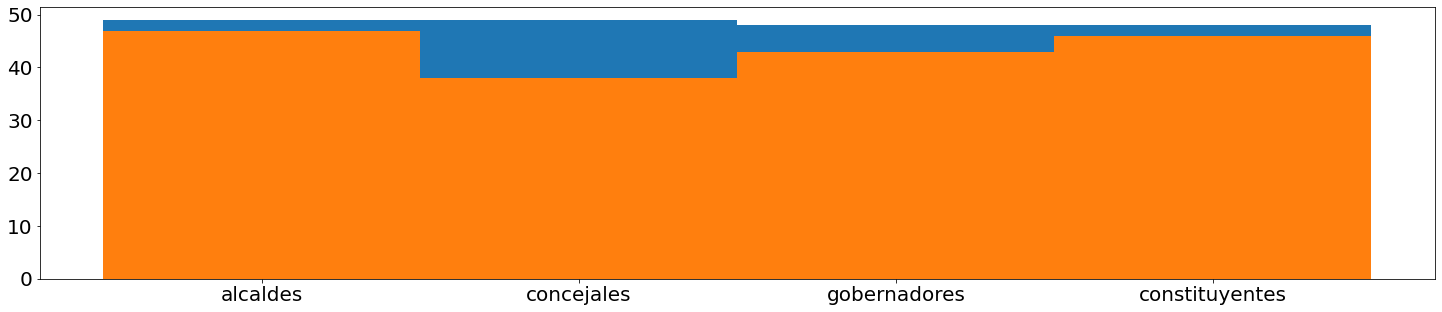

In [154]:
### Pendiente, es Q4_1 hasta Q4_4


#### por ahora no tomamos en cuenta quien dice que si no que sumamos todo. 
computo = []
no = []

for index, row in X.iterrows():
  if row["q4_1"] == 1: 
    computo.append(1)
  elif row["q4_1"] == 2:
    no.append(1)
  if row.q4_2 == 1: 
    computo.append(2)
  elif row["q4_2"] == 2:
    no.append(2)
  if row.q4_3 == 1: 
    computo.append(3)
  elif row["q4_3"] == 2:
    no.append(3)
  if row.q4_4 == 1: 
    computo.append(4)
  elif row["q4_4"] == 2:
    no.append(4)

### naranjo si, azul total
plt.figure(figsize=(25,5))
plt.hist((computo + no), bins = [0.5,1.5,2.5,3.5,4.5])


plt.hist(computo, bins = [0.5,1.5,2.5,3.5,4.5])

plt.xticks([1,2,3,4], ['alcaldes', 'concejales', 'gobernadores', 'constituyentes'])




<h2>Sobre las elecciones de constituyentes del 15 y 16 de mayo: ¿usted tiene decidido por quién votar o lo decidirá en el momento?
- 1: Tengo decidido
- 2: Aun no lo decido
- 3: Lo decidiréé en el momento
- 4: No iré a votar

tengo decidido: 36    aun no lo decido: 2    lo decidire en el momento: 1    no ire a votar 7    total encuestas 49


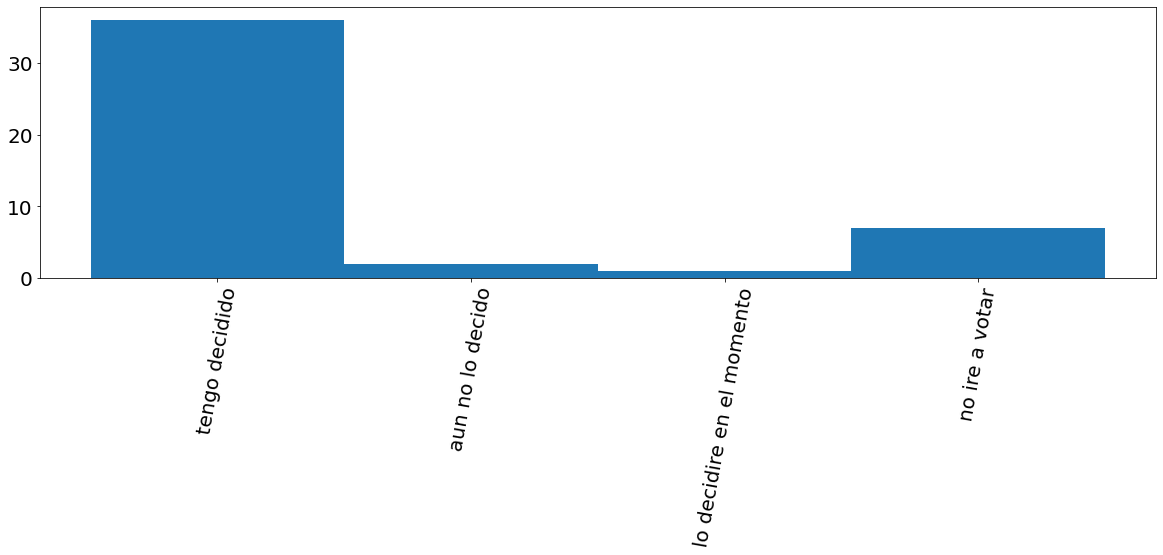

In [155]:
plt.figure(figsize=(20,5))
plt.hist(X["q5_y"], bins = [0.5,1.5,2.5,3.5,4.5])
plt.xticks([1,2,3,4], ['tengo decidido', 'aun no lo decido', 'lo decidire en el momento', 'no ire a votar'],rotation=80) 

print("tengo decidido: " + str(X[X["q5_y"]==1]["q5_y"].count()) +  "    aun no lo decido: " + str(X[X["q5_y"]==2]["q5_y"].count()) +  "    lo decidire en el momento: " + str(X[X["q5_y"]==3]["q5_y"].count()) + "    no ire a votar " + str(X[X["q5_y"]==4]["q5_y"].count()) + "    total encuestas " + str(X["idusuario"].count()) )


<h2> Por favor imagine las características de un/a candidato/a ideal para la convención constitucional. 

A continuación le presentamos distintas características que podría tener un candidato/a ¿qué tan importantes son aquellas características para usted?

Considere que 1 es "poco importante", y 7 "muy importante".

<h3> Una larga trayectoria politica

Media:Menor a 10: 3.3777777777777778
Desvest.Menor a 10: 1.2484333616921084


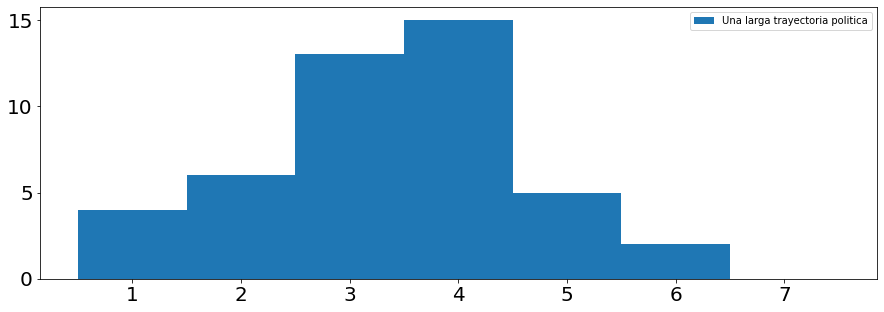

In [156]:
## pendiente, Q10_1
plt.figure(figsize=(15,5))
plt.hist([X["q10_1"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="Una larga trayectoria politica")

plt.legend()
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)


print("Media:"+labX+": " + str(X["q10_1"].mean())   )

print("Desvest."+labX+": " + str(X["q10_1"].std()) )


<h3> Conocimientos tecnicos relevantes para el pais

Media:Menor a 10: 6.0625
Desvest.Menor a 10: 1.1186285295995462


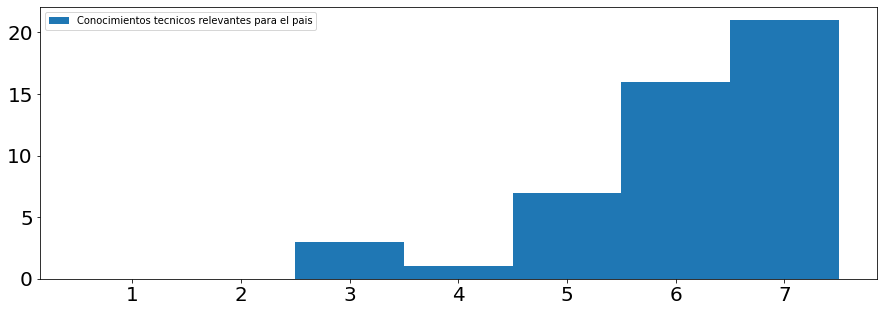

In [157]:
plt.figure(figsize=(15,5))
plt.hist([X["q10_2"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="Conocimientos tecnicos relevantes para el pais")

plt.legend()
plt.rc('xtick', labelsize=20)


print("Media:"+labX+": " + str(X["q10_2"].mean())   )

print("Desvest."+labX+": " + str(X["q10_2"].std()) )

<h3> Que viva en mi barrio/sector

Media:Menor a 10: 3.0952380952380953
Desvest.Menor a 10: 1.8585271353035706


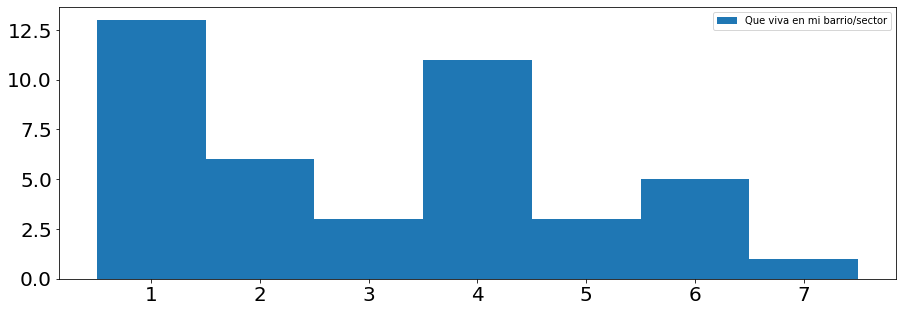

In [158]:
plt.figure(figsize=(15,5))
plt.hist([X["q10_3"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="Que viva en mi barrio/sector")

plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_3"].mean())   )

print("Desvest."+labX+": " + str(X["q10_3"].std()) )

<h3> Que pertenezca a un movimiento social

Media:Menor a 10: 3.3902439024390243
Desvest.Menor a 10: 1.9732973519022392


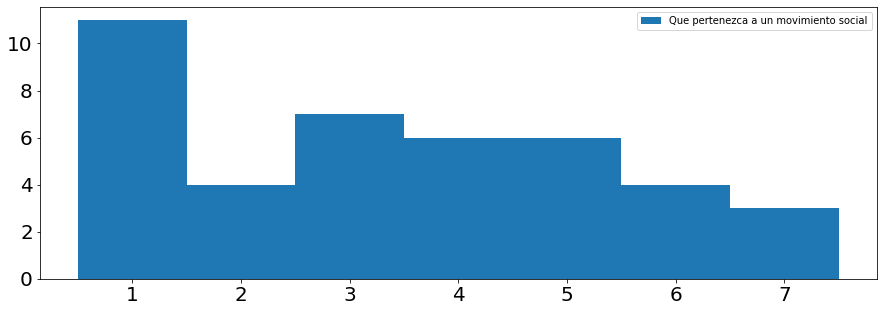

In [159]:
plt.figure(figsize=(15,5))
plt.hist([X["q10_4"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="Que pertenezca a un movimiento social")

plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_4"].mean())   )

print("Desvest."+labX+": " + str(X["q10_4"].std()) )

<h3> Que haya nacido en Chile

Media:Menor a 10: 4.840909090909091
Desvest.Menor a 10: 2.1124567623832418


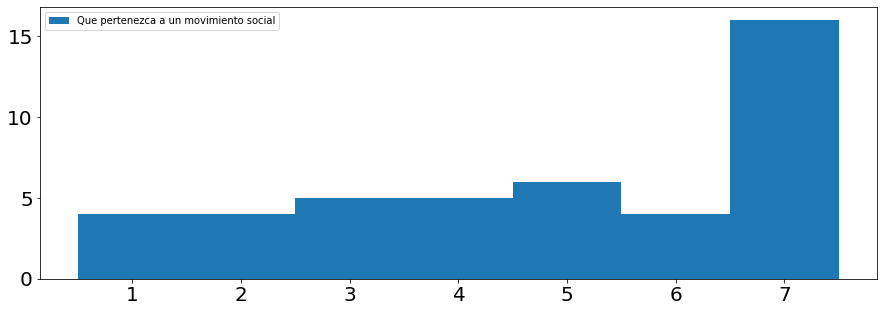

In [160]:
plt.figure(figsize=(15,5))
plt.hist([X["q10_5"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="Que pertenezca a un movimiento social")

plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_5"].mean())   )

print("Desvest."+labX+": " + str(X["q10_5"].std()) )

<h3> Que tenga estudios universitarios

Media:Menor a 10: 5.595744680851064
Desvest.Menor a 10: 1.2624953631957057


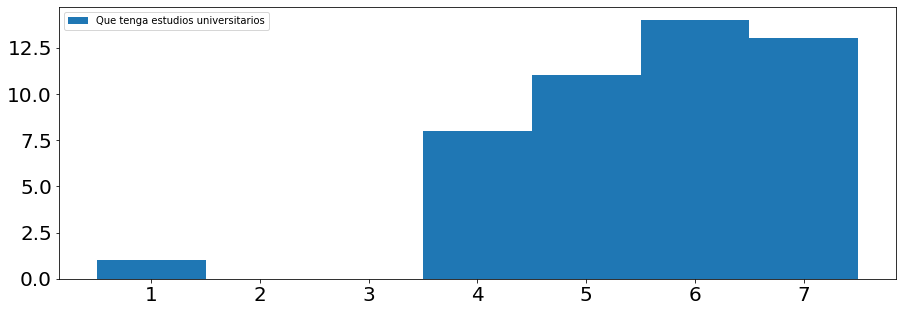

In [161]:
plt.figure(figsize=(15,5))
plt.hist([X["q10_6"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label="Que tenga estudios universitarios")

plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_6"].mean())   )

print("Desvest."+labX+": " + str(X["q10_6"].std()) )

<h3> Que sea honesto

0.9795918367346939
Media:Menor a 10: 6.854166666666667
Desvest.Menor a 10: 0.5048523413086468


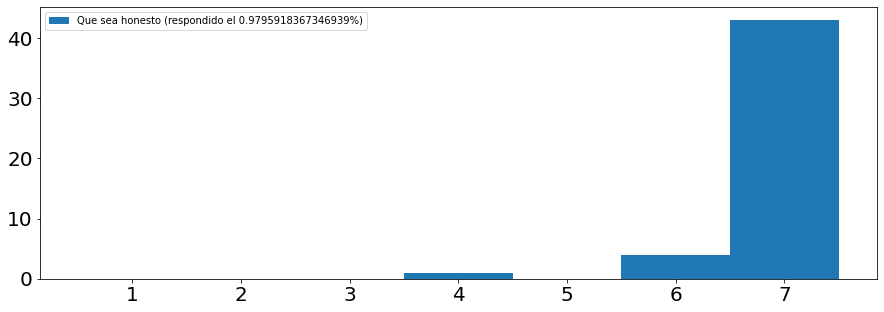

In [162]:
porcentaje = X["q10_7"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q10_7"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label=("Que sea honesto (respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_7"].mean())   )

print("Desvest."+labX+": " + str(X["q10_7"].std()) )

<h3>Que profese mi religion

0.7755102040816326
Media:Menor a 10: 2.210526315789474
Desvest.Menor a 10: 1.8476851073831593


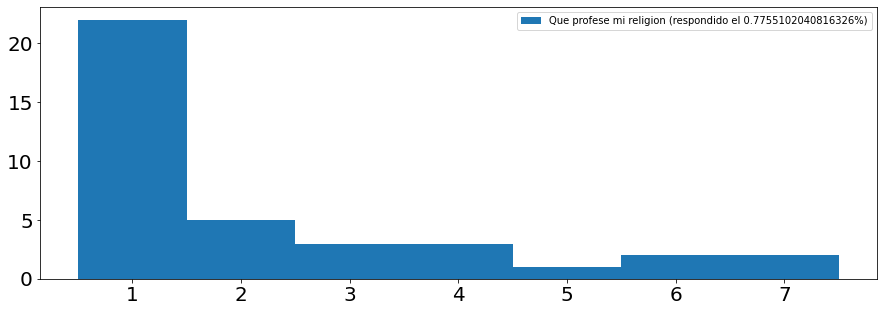

In [163]:
porcentaje = X["q10_8"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q10_8"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label=("Que profese mi religion (respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_8"].mean())   )

print("Desvest."+labX+": " + str(X["q10_8"].std()) )

<h3> Que pertenezca a algun pueblo originario

0.7755102040816326
Media:Menor a 10: 2.526315789473684
Desvest.Menor a 10: 1.9554061181174054


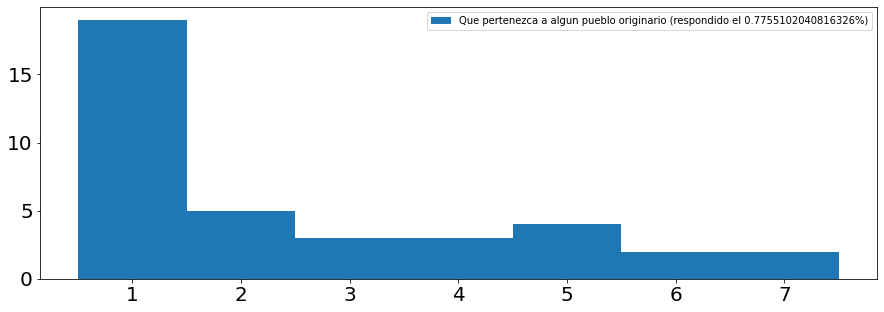

In [164]:
porcentaje = X["q10_9"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q10_9"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label=("Que pertenezca a algun pueblo originario (respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q10_9"].mean())   )

print("Desvest."+labX+": " + str(X["q10_9"].std()) )

<h3> Otra, cual? 


 Preprocessed Data:  opinion temas valoricos equilibrado trato poder dialogar dispuesto ceder dialogante polнtico capacidad dialogar buscar acuerdos capacidad diбlogo interйs comъn mбs propio ( ego controlado ) populista corrupte mujer abogado mujer deje llevar slogans enttienda complejidad problemas `` mateo '' , lea estudie experiencia tema visiуn pluralista integradora diversidad visiones sepa quiera `` dialogar ''


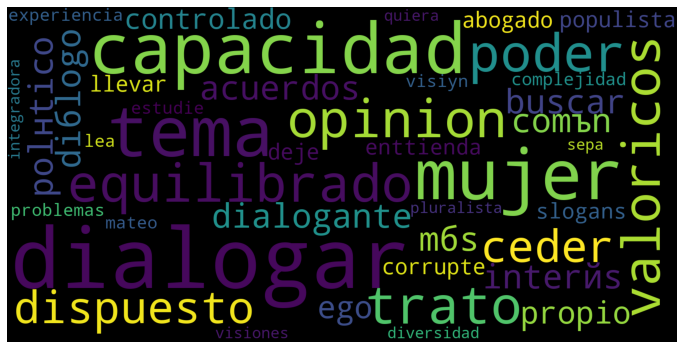

In [165]:
todo = " "
go_cloud = 1
for exto in X.q10_10_text:
  if isinstance(exto,str):
    todo = todo + " " + exto
    go_cloud = 1
 
if go_cloud:

  wordcloud_generator = WordCloudGeneration()
  # you may uncomment the following line to use custom input
  # input_text = input("Enter the text here: ")
  input_text = todo
  input_text = input_text.split('.')
  clean_data = wordcloud_generator.preprocessing(input_text)
  wordcloud_generator.create_word_cloud(clean_data)

<h2> En su opinión: ¿Qué tan probable es que las personas que resulten electas en su distrito se parezcan a su candidato ideal?  

OJO: 
- 1 es muy probable
- 4 es poco probable

0.9183673469387755
Media:Menor a 10: 2.1333333333333333
Desvest.Menor a 10: 0.6605782590758161


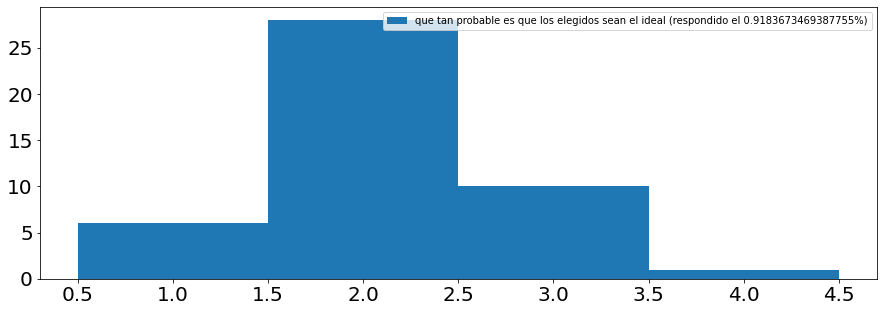

In [166]:
porcentaje = X["q11_y"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q11_y"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5], label=("que tan probable es que los elegidos sean el ideal (respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q11_y"].mean())   )

print("Desvest."+labX+": " + str(X["q11_y"].std()) )

<h2> Pensando en los candidatos/as que resultarán electos y conformarán la Convención Constitucional, ¿cree que estos serán...?

- 1: Mayoritariamente rostros nuevos
- 2: mitad - mitad
- 3: Mayoritariemente rostros conocidos (politicos artistas deportistas etc) 

1.0
Media:Menor a 10: 2.326530612244898
Desvest.Menor a 10: 0.5911766199016731


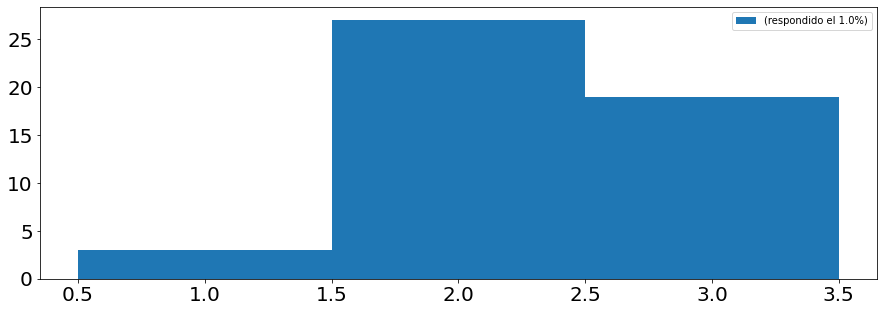

In [167]:
porcentaje = X["q12_y"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q12_y"].values.flatten()], bins = [0.5,1.5,2.5,3.5], label=("(respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q12_y"].mean())   )

print("Desvest."+labX+": " + str(X["q12_y"].std()) )

<h2> ¿Cuál de las siguientes emociones representa mejor su sentir respecto al proceso constituyente en curso?

- 1: Esperanza
- 2: Alegria 
- 3: Indiferencia 
- 4: Miedo
- 5: Desaliento
- 6: Desconfianza
- 7: Incertidumbre
- 8: Confusióón
- 9: otro

1.0

 Preprocessed Data:  motivacion


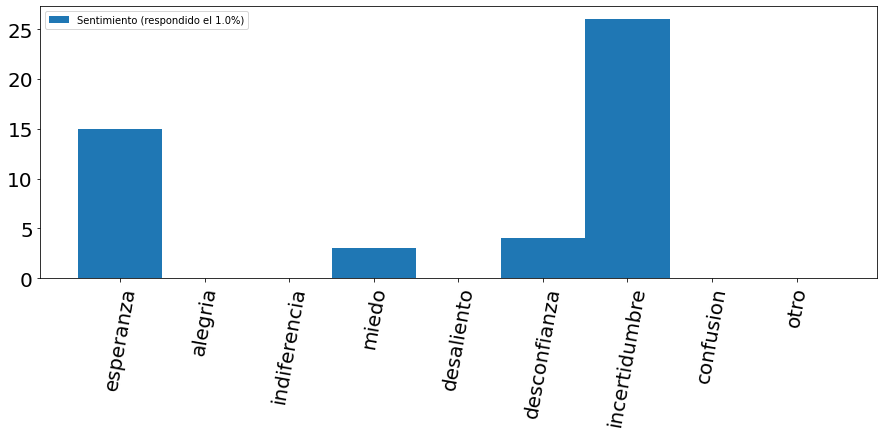

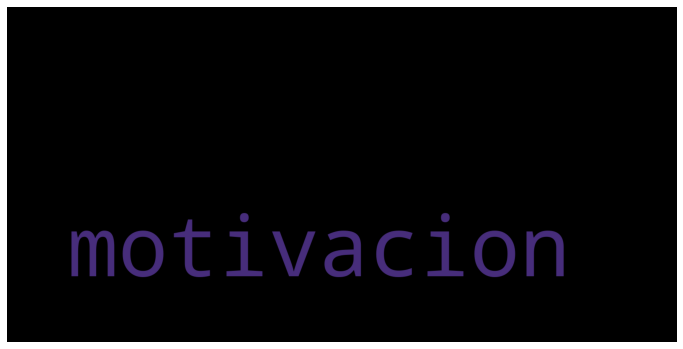

In [168]:
porcentaje = X["q13_y"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q13_y"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], label=("Sentimiento (respondido el " + str(porcentaje) + "%)"))
plt.xticks([1,2,3,4,5,6,7,8,9], ['esperanza','alegria', 'indiferencia', 'miedo', 'desaliento', 'desconfianza', 'incertidumbre', 'confusion', 'otro'],rotation=80) 


plt.legend()


todo = " "
go_cloud = 1
for exto in X.q13_10_text:
  if isinstance(exto,str):
    todo = todo + " " + exto
    go_cloud = 1
 
if go_cloud:

  wordcloud_generator = WordCloudGeneration()
  # you may uncomment the following line to use custom input
  # input_text = input("Enter the text here: ")
  input_text = todo
  input_text = input_text.split('.')
  clean_data = wordcloud_generator.preprocessing(input_text)
  wordcloud_generator.create_word_cloud(clean_data)


<h2> En una escala del 1 a 7, en que 1 es "no habrá cambios relevantes" y 7 es "habrá cambios muy relevantes": ¿Cuánto cree que el proceso constituyente va a cambiar Chile?

0.9795918367346939
Media:Menor a 10: 4.458333333333333
Desvest.Menor a 10: 1.2369890233836478


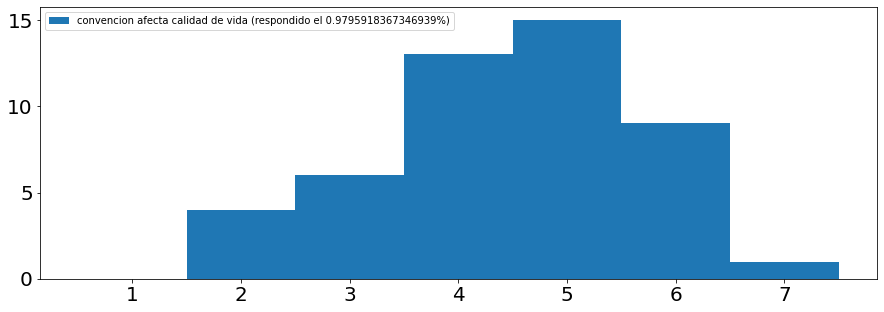

In [169]:
porcentaje = X["q14_1"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q14_1"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label=("convencion afecta calidad de vida (respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q14_1"].mean())   )

print("Desvest."+labX+": " + str(X["q14_1"].std()) )

<h2> En el mismo sentido, en una escala del 1 a 7, en que 1 es "empeorará" y 7 es "mejorará" ¿en qué grado cree usted que el proceso constituyente afectará su calidad de vida?

0.9795918367346939
Media:Menor a 10: 3.9375
Desvest.Menor a 10: 1.327391458879551


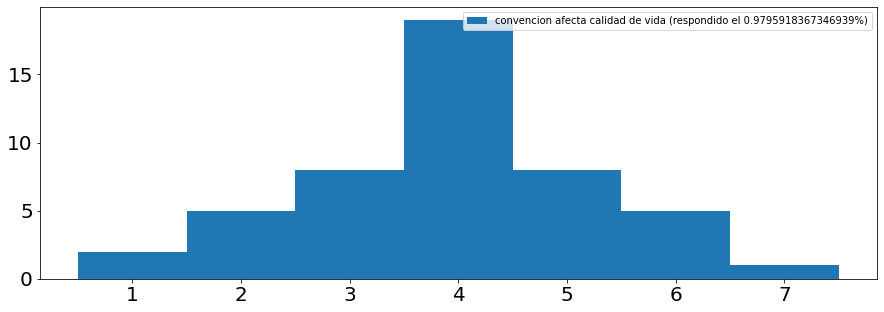

In [170]:
porcentaje = X["q15_2"].count() / X["idusuario"].count()
print(porcentaje)

plt.figure(figsize=(15,5))
plt.hist([X["q15_2"].values.flatten()], bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], label=("convencion afecta calidad de vida (respondido el " + str(porcentaje) + "%)"))


plt.legend()
plt.rc('xtick', labelsize=20)



print("Media:"+labX+": " + str(X["q15_2"].mean())   )

print("Desvest."+labX+": " + str(X["q15_2"].std()) )

<h2> ¿Cuáles son para usted los temas más relevantes que se debiesen discutir en el proceso constituyente? (Puede marcar más de una alternativa)

- 1: Salud
- 2: Seguridad Social
- 3: Educacion
- 4: Cuidado del Medio Ambiente
- 5: Propiedad de los recursos naturales 
- 6: Reforma a Carabineros
- 7: Derechos de pueblos originarios
- 8: Derechos Poblacióón migrante
- 9: Igualdad de genero y derechos d elas mujeres
- 10: Cuidado de la infancia
- 11: otro 


(array([41, 39, 43, 31, 29,  9, 21, 15, 31, 27, 12]), array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5]))

 Preprocessed Data:  independencia banco central justicia institucionalidad polнtica gobierno nacional organizaciуn polнtica , bases institucionalidad sistema gobierno cambio sistema politico derechos iguales todas orientaciones sexuales , derecho eutanacia , aborto , eliminar lucro afp , educaciуn isapres descentralizaciуn desarrollo tecnolуgico pais gobernabilidad regimen gobierno adulto mayor


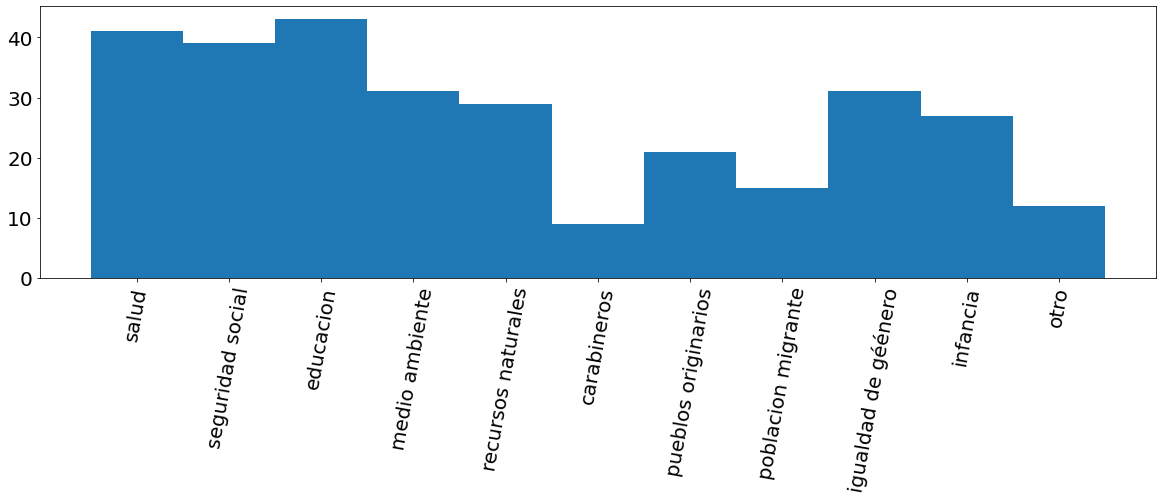

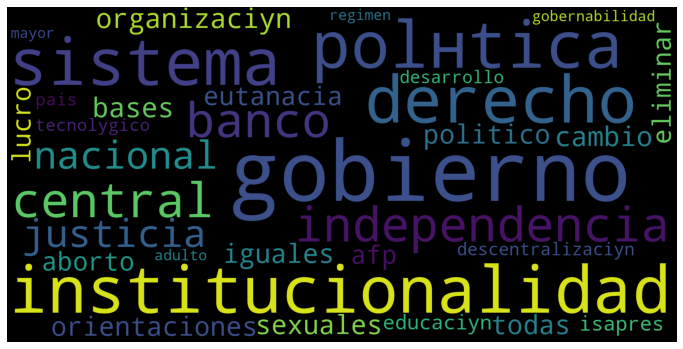

In [171]:
computo = []

for respuesta in X["q16_y"]:
  if isinstance(respuesta, str):
    for op in respuesta.split(","): 
      computo.append(int(op))

cuenta = numpy.histogram(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])

print(cuenta)
plt.figure(figsize=(20,5))
plt.hist(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])

plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['salud', 'seguridad social', 'educacion', 'medio ambiente', 'recursos naturales', 'carabineros', 'pueblos originarios', 'poblacion migrante', 'igualdad de géénero','infancia','otro'],rotation=80) 


todo = " "
go_cloud = 1
for exto in X.q16_11_text:
  if isinstance(exto,str):
    todo = todo + " " + exto
    go_cloud = 1
 
if go_cloud:

  wordcloud_generator = WordCloudGeneration()
  # you may uncomment the following line to use custom input
  # input_text = input("Enter the text here: ")
  input_text = todo
  input_text = input_text.split('.')
  clean_data = wordcloud_generator.preprocessing(input_text)
  wordcloud_generator.create_word_cloud(clean_data)



<h2> Y ahora, ¿cuáles son para usted los temas que NO se debiesen discutir durante la redacción de una nueva constitución? (Puede marcar más de una alternativa)

- 1: Igualdad de genero y derechos de las mujeres
- 2: Medio Ambiente 
- 3: Derechos de pueblos originarios
- 4: Salud
- 5: Educacion
- 6: Derechos de poblacion migrante
- 7: Seguridad Social
- 8: Recursos Naturales
- 9: Reforma a Carabineros
- 10: otro 

(array([ 5,  0,  8,  1,  2, 15,  2,  5, 30,  1]), array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]))

 Preprocessed Data:  pueden discutirse


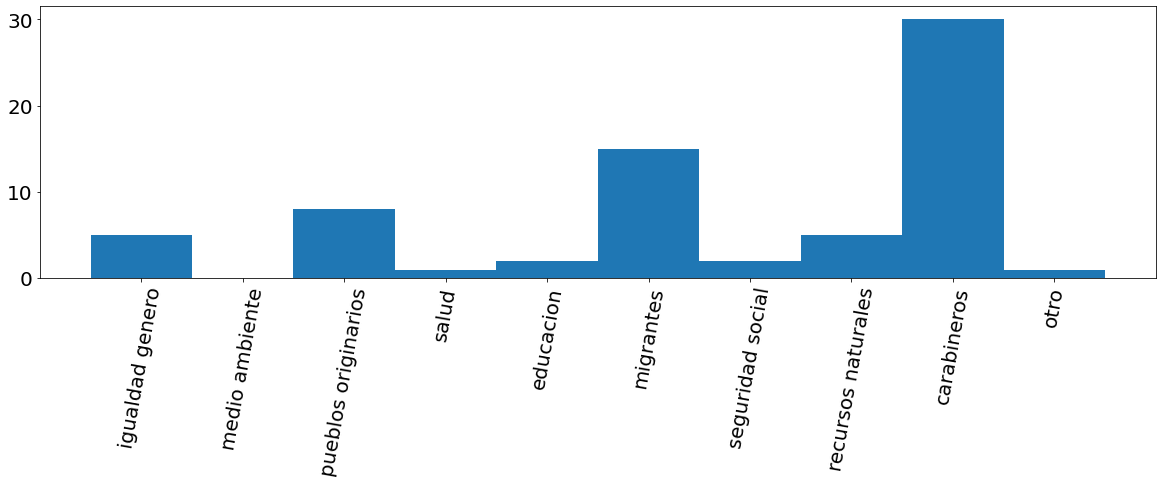

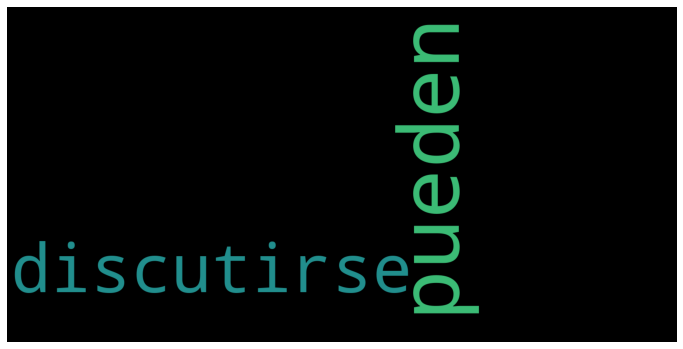

In [172]:
computo = []

for respuesta in X["q17"]:
  if isinstance(respuesta, str):
    for op in respuesta.split(","): 
      computo.append(int(op))

cuenta = numpy.histogram(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])

print(cuenta)
plt.figure(figsize=(20,5))
plt.hist(computo, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])

plt.xticks([1,2,3,4,5,6,7,8,9,10], ['igualdad genero', 'medio ambiente', 'pueblos originarios', 'salud', 'educacion', 'migrantes', 'seguridad social', 'recursos naturales', 'carabineros','otro'],rotation=80) 


todo = " "
go_cloud = 1
for exto in X.q17_10_text:
  if isinstance(exto,str):
    todo = todo + " " + exto
    go_cloud = 1
 
if go_cloud:

  wordcloud_generator = WordCloudGeneration()
  # you may uncomment the following line to use custom input
  # input_text = input("Enter the text here: ")
  input_text = todo
  input_text = input_text.split('.')
  clean_data = wordcloud_generator.preprocessing(input_text)
  wordcloud_generator.create_word_cloud(clean_data)

<h2> Si pudiera enviarle un mensaje de WhatsApp a tu Constituyente para pedirle que hiciera algo en particular, que para usted es muy importante: ¿qué le pediría?


 Preprocessed Data:  ponga zapatos habra dialogo , intentar buscar mejor conversar resguardar propiedad disminuir den valor libertad elegir igualdad debe ser acceso , oportunidad buen administrador recursos puede decidir personas seguridad social , retomar orden publico , destruir alcanzado 40 aсos , sino mбs bien actualizar existente y/o mejorar bases actuales - cuidado agua , uso energнas renovables , cuidado medio ambiente negocie principio temas mas visibles posibles canjear , matrimonio igualitario , aborto cambio acordar tambiйn temas claves mantener sociedad moderna orden rigor conocimiento estudio realidades honestidad trabajo responsabilidad asegurar nueva constituciуn documento serio bien redactado , atienda nuevas necesidades paнs miras nuevos tiempos , respetando hoy permitido ser tremendo paнs escucha piensa todes ponga foco generar incentivos polнticos busquen bien comъn solo buscar reelegirse prуxima elecciуn ademбs reformar sistema polнtico manera incentive articular a

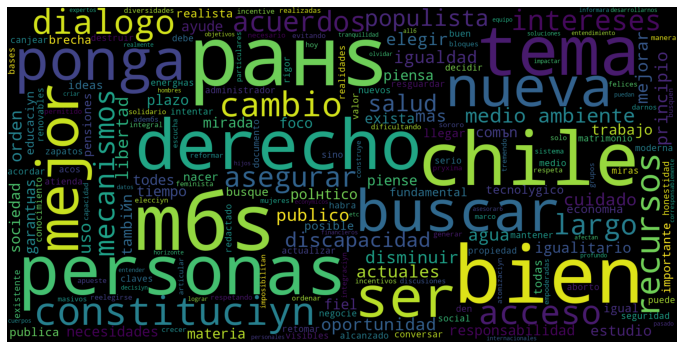

In [173]:
todo = " "
for exto in X.q18_y:
  if isinstance(exto,str):
    todo = todo + " " + exto

 
wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
input_text = todo
input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)